In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\breastcancer.csv")#REading the csv doc

In [3]:
df.head() #Get the first five rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape #Returns the shape of the dataframe

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.describe() #Described each column statistically

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.dtypes #Returns the datatype of each column

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
df["diagnosis"].value_counts() #Does a value count

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
print(df.isnull().sum()) #Returns the number of missing values in each column

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.duplicated().value_counts()#Returns the number of duplicated and nonduplicated values

False    569
dtype: int64

In [12]:
df.drop(["id","Unnamed: 32"], inplace=True, axis=1)#dropping two columns

In [13]:
# df.corr()

To show the distinction between the two categories

In [14]:
#Grouping by the diagnosis and calculating the mean of each columns for each label
diff = df.groupby("diagnosis").mean()
diff

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


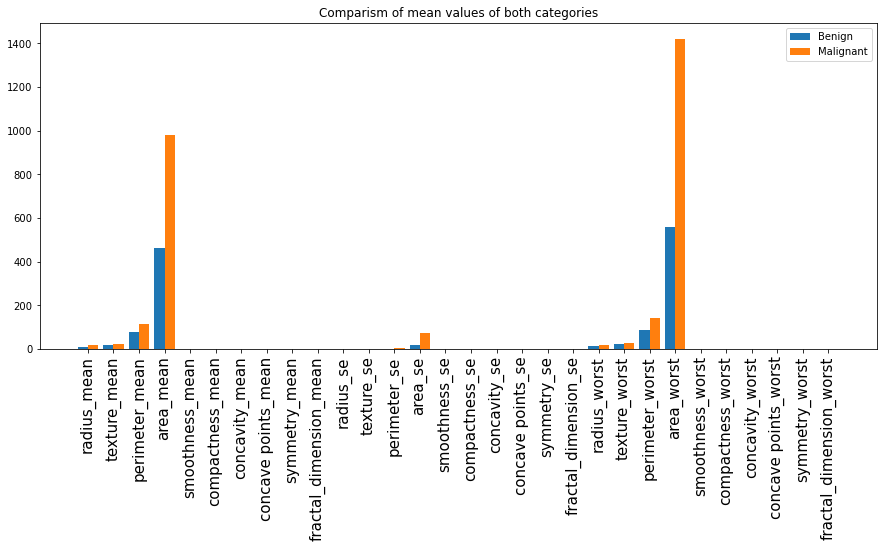

In [15]:
x_axis = np.arange(len(diff.columns)) #making the xaxis the length of the columns

plt.figure(figsize = (15,6))#creating a figure with a particular size

plt.bar(x_axis -0.2, diff.loc["B",:], width=0.4, label = 'Benign')
plt.bar(x_axis +0.2, diff.loc["M",:], width=0.4, label = 'Malignant')

# Xticks

plt.xticks(x_axis, diff.columns)
plt.tick_params(axis='x', labelrotation=90, labelsize=15)#rotating the xlabels and increasing the labelsize

# Add legend

plt.legend()#adding legends

# Display
plt.title("Comparism of mean values of both categories")#adding a title
plt.show()


We can see that the malignant characteristics of the breast mass is greater than the beneign. There is a clear distinction

### Dimensionality reduction to visualize the data using PCA

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df_pca = df.copy() #Make a copy of the dataframe to be used for the pca

labels = df["diagnosis"] #Getting the labels
features = df.drop("diagnosis", axis=1) #Features are everything except the labels

In [18]:
#standardizing the features
stand_data = StandardScaler().fit_transform(features) #standardizing the features
print(stand_data.shape) #print the shape of the standardized data

(569, 30)


### Using my own PCA algorithm

In [19]:
#Finding the covariance
sample_data = stand_data
#Covariance matrix is the multiplication of the data and its transpose
covar_matrix = np.matmul(sample_data.T, sample_data)

print(f"The shape of the covariance matrix is {covar_matrix.shape}")

The shape of the covariance matrix is (30, 30)


In [20]:
from scipy.linalg import eigh

#Returns eigen values and vectors from low to high order
values,vectors = eigh(covar_matrix, eigvals = (28,29)) #selecting two principal components


vectors = vectors.T #Taking the transpose
print(f'Shape of eigen vectors, {vectors.shape}')

Shape of eigen vectors, (2, 30)


In [21]:
new_coordinates = np.matmul(vectors, sample_data.T)

print(f"New datapoints will be {vectors.shape} X {sample_data.T.shape} = {new_coordinates.shape}")

New datapoints will be (2, 30) X (30, 569) = (2, 569)


In [22]:
#Overlapping or stacking the new data points with just two components with the labels

new_coordinates = np.vstack((new_coordinates, labels)).T
print(new_coordinates.shape)

(569, 3)


In [25]:
#Creating a dataframe with the two components and labels
dataframe = pd.DataFrame(data=new_coordinates,
                        columns = ('1st Principal', '2nd Principal', 'Labels'))

print(dataframe.head()) #Display the first five rows

  1st Principal 2nd Principal Labels
0      1.948583     -9.192837      M
1     -3.768172     -2.387802      M
2     -1.075174     -5.733896      M
3     10.275589     -7.122953      M
4     -1.948072     -3.935302      M


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


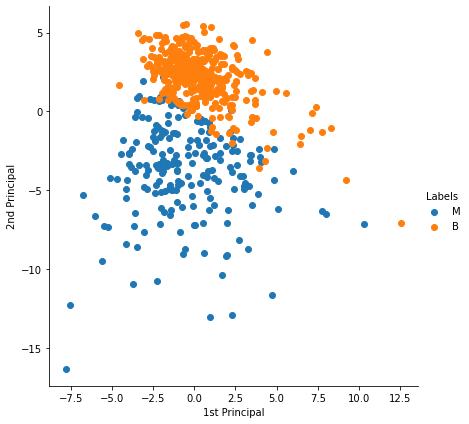

In [24]:
sns.FacetGrid(dataframe, hue='Labels',size=6)\
   .map(plt.scatter, '1st Principal','2nd Principal')\
   .add_legend()

plt.show()#Show figure

### Using the seaborn PCA algorithm to compare figures

In [26]:
pca = decomposition.PCA()

In [28]:
pca.n_components = 2 #Two pca components
pca_data = pca.fit_transform(sample_data) #transform the already standardized data

print(pca_data.shape)#Display the no of rows and columns

(569, 2)


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


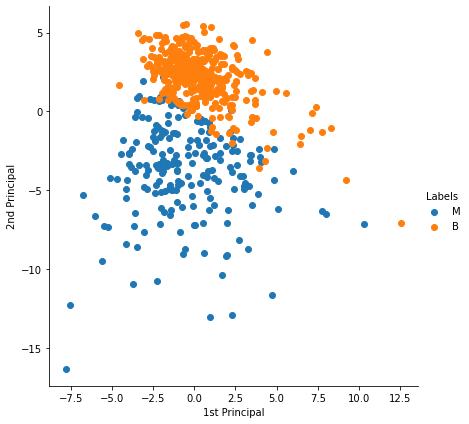

In [29]:
pca_data = np.vstack((pca_data.T, labels.T)).T

pca_df = pd.DataFrame(pca_data, columns = ('1st Principal', '2nd Principal', 'Labels'))

sns.FacetGrid(dataframe, hue = 'Labels', size = 6)\
   .map(plt.scatter, '1st Principal', '2nd Principal')\
   .add_legend()

plt.show()

It is the same with my algorithm. We can visualize in 2d the distribution of the two labels (benign and malignant) and see there is a clear distinction between the two labels

### Data Cleaning

In [33]:
#Encoding the categorical variable to a binary feature
labelencoder = LabelEncoder()
df["label"] = labelencoder.fit_transform(df["diagnosis"])

In [34]:
df["label"].value_counts()

0    357
1    212
Name: label, dtype: int64

In [35]:
#Dropping the diagnosis column since we already have abinary feature denoting that
df.drop(["diagnosis"], inplace=True, axis=1)

In [36]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'label'],
      dtype='object')

### Defining the feature and target variables

In [37]:
df.shape

(569, 31)

In [38]:
X = df.drop("label", axis=1) #Feature
y = df["label"] #label

In [39]:
print(f'The feature shape is {X.shape}')

The feature shape is (569, 30)


In [40]:
X.head()#first five rows

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
y.head() #First five rows of label dataset

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [42]:
#Splitting into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [43]:
#Printing the shapes of each
print(f'The X_train shape is {X_train.shape}')
print(f'The X_test shape is {X_test.shape}')
print(f'The y_train shape is {y_train.shape}')
print(f'The y_test shape is {y_test.shape}')

The X_train shape is (455, 30)
The X_test shape is (114, 30)
The y_train shape is (455,)
The y_test shape is (114,)


### Data Transformation

In [44]:
#standardizing the training and testing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

#summarize results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[67  0]
 [ 5 42]]


### Hyperparameter tuning

In [47]:
#Noting the 0.96

#defining the knn parameters for grid search
knn_params = {
    "n_neighbors": range(1,40,2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "leaf_size": range(2,50,5)
}

#knn model
knn = KNeighborsClassifier()

#grid search
grid_search_knn = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=-1, cv=10, scoring="accuracy")
grid_results = grid_search_knn.fit(X_train, y_train)

#best_model
best_model = knn.set_params(**grid_results.best_params_)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

#results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[66  1]
 [ 5 42]]
{'leaf_size': 2, 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


### Logistic regression

In [56]:
log_params = {
    "C": np.logspace(-3,3,7),
    "penalty": ["l2"],
    "solver": ["liblinear", 'lbfgs']
}

#Logisticregression model
log = LogisticRegression()

grid_search_log = GridSearchCV(estimator=log, param_grid=log_params,scoring='accuracy', cv=10, n_jobs=-1)
grid_results = grid_search_log.fit(X_train, y_train)

#best_model
best_model = log.set_params(**grid_results.best_params_)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

#results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"The best parameters are {grid_results.best_params_}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[66  1]
 [ 3 44]]
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### SVM